In [1]:
# Object Detection using TensorFlow

In [2]:
# Imports
import os
import pathlib
import io
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
import tensorboard as tb
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline

2023-05-15 15:28:20.573815: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 15:28:24.108064: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 15:28:34.902066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Clone the tensorflow models repo if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
    while "models" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('models').exists():
    !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3842, done.
remote: Counting objects: 100% (3842/3842), done.
remote: Compressing objects: 100% (2943/2943), done.
remote: Total 3842 (delta 1110), reused 1947 (delta 848), pack-reused 0
Receiving objects: 100% (3842/3842), 49.59 MiB | 3.61 MiB/s, done.
Resolving deltas: 100% (1110/1110), done.


In [4]:
def load_image_into_numpy_array(path):
    # tf.io.gfile = tb.compat.tensorflow_stub.io.gfile
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [5]:
# Install the object detection API
# !cd models/research/
# !protoc ./models/research/object_detection/protos/*.proto --python_out=.
# !cp ./models/research/object_detection/packages/tf2/setup.py
# !python3 -m pip install .

In [6]:
# Load the COCO label map
category_index = {
1: {
  'id': 1,
  'name': "person"
},
2: {
  'id': 2,
  'name': "bicycle"
},
3: {
  'id': 3,
  'name': "car"
},
4: {
  'id': 4,
  'name': "motorcycle"
},
5: {
  'id': 5,
  'name': "airplane"
},
6: {
  'id': 6,
  'name': "bus"
},
7: {
  'id': 7,
  'name': "train"
},
8: {
  'id': 8,
  'name': "truck"
},
9: {
  'id': 9,
  'name': "boat"
},
10: {
  'id': 10,
  'name': "traffic light"
},
11: {
  'id': 11,
  'name': "fire hydrant"
},
13: {
  'id': 13,
  'name': "stop sign"
},
14: {
  'id': 14,
  'name': "parking meter"
},
15: {
  'id': 15,
  'name': "bench"
},
16: {
  'id': 16,
  'name': "bird"
},
17: {
  'id': 17,
  'name': "cat"
},
18: {
  'id': 18,
  'name': "dog"
},
19: {
  'id': 19,
  'name': "horse"
},
20: {
  'id': 20,
  'name': "sheep"
},
21: {
  'id': 21,
  'name': "cow"
},
22: {
  'id': 22,
  'name': "elephant"
},
23: {
  'id': 23,
  'name': "bear"
},
24: {
  'id': 24,
  'name': "zebra"
},
25: {
  'id': 25,
  'name': "giraffe"
},
27: {
  'id': 27,
  'name': "backpack"
},
28: {
  'id': 28,
  'name': "umbrella"
},
31: {
  'id': 31,
  'name': "handbag"
},
32: {
  'id': 32,
  'name': "tie"
},
33: {
  'id': 33,
  'name': "suitcase"
},
34: {
  'id': 34,
  'name': "frisbee"
},
35: {
  'id': 35,
  'name': "skis"
},
36: {
  'id': 36,
  'name': "snowboard"
},
37: {
  'id': 37,
  'name': "sports ball"
},
38: {
  'id': 38,
  'name': "kite"
},
39: {
  'id': 39,
  'name': "baseball bat"
},
40: {
  'id': 40,
  'name': "baseball glove"
},
41: {
  'id': 41,
  'name': "skateboard"
},
42: {
  'id': 42,
  'name': "surfboard"
},
43: {
  'id': 43,
  'name': "tennis racket"
},
44: {
  'id': 44,
  'name': "bottle"
},
46: {
  'id': 46,
  'name': "wine glass"
},
47: {
  'id': 47,
  'name': "cup"
},
48: {
  'id': 48,
  'name': "fork"
},
49: {
  'id': 49,
  'name': "knife"
},
50: {
  'id': 50,
  'name': "spoon"
},
51: {
  'id': 51,
  'name': "bowl"
},
52: {
  'id': 52,
  'name': "banana"
},
53: {
  'id': 53,
  'name': "apple"
},
54: {
  'id': 54,
  'name': "sandwich"
},
55: {
  'id': 55,
  'name': "orange"
},
56: {
  'id': 56,
  'name': "broccoli"
},
57: {
  'id': 57,
  'name': "carrot"
},
58: {
  'id': 58,
  'name': "hot dog"
},
59: {
  'id': 59,
  'name': "pizza"
},
60: {
  'id': 60,
  'name': "donut"
},
61: {
  'id': 61,
  'name': "cake"
},
62: {
  'id': 62,
  'name': "chair"
},
63: {
  'id': 63,
  'name': "couch"
},
64: {
  'id': 64,
  'name': "potted plant"
},
65: {
  'id': 65,
  'name': "bed"
},
67: {
  'id': 67,
  'name': "dining table"
},
70: {
  'id': 70,
  'name': "toilet"
},
72: {
  'id': 72,
  'name': "tv"
},
73: {
  'id': 73,
  'name': "laptop"
},
74: {
  'id': 74,
  'name': "mouse"
},
75: {
  'id': 75,
  'name': "remote"
},
76: {
  'id': 76,
  'name': "keyboard"
},
77: {
  'id': 77,
  'name': "cell phone"
},
78: {
  'id': 78,
  'name': "microwave"
},
79: {
  'id': 79,
  'name': "oven"
},
80: {
  'id': 80,
  'name': "toaster"
},
81: {
  'id': 81,
  'name': "sink"
},
82: {
  'id': 82,
  'name': "refrigerator"
},
84: {
  'id': 84,
  'name': "book"
},
85: {
  'id': 85,
  'name': "clock"
},
86: {
  'id': 86,
  'name': "vase"
},
87: {
  'id': 87,
  'name': "scissors"
},
88: {
  'id': 88,
  'name': "teddy bear"
},
89: {
  'id': 89,
  'name': "hair drier"
},
90: {
  'id': 90,
  'name': "toothbrush"
},
}

In [7]:
# Download the saved model and put it into models/research/object_detection/test_data

In [8]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d5_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d5_coco17_tpu-32.tar.gz
!mv efficientdet_d5_coco17_tpu-32/ models/research/object_detection/test_data/

--2023-05-15 15:29:05--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d5_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 2404:6800:4002:82d::2010, 142.250.206.144
Connecting to download.tensorflow.org (download.tensorflow.org)|2404:6800:4002:82d::2010|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256286417 (244M) [application/x-tar]
Saving to: ‘efficientdet_d5_coco17_tpu-32.tar.gz’

efficientdet_d5_coc 100%[===================>] 244.41M  3.75MB/s    in 70s     

2023-05-15 15:30:15 (3.51 MB/s) - ‘efficientdet_d5_coco17_tpu-32.tar.gz’ saved [256286417/256286417]



In [9]:
# Loading the downloaded model
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('models/research/object_detection/test_data/efficientdet_d5_coco17_tpu-32/saved_model')
end_time = time.time()
elapsed_time = end_time-start_time
print('Elapsed Time: ', elapsed_time)

Elapsed Time:  55.224032402038574


2023-05-15 15:31:16.354105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_tensor' with dtype uint8 and shape [1,?,?,3]
	 [[{{node input_tensor}}]]


Elapsed time: 15.437706589698792 second per image


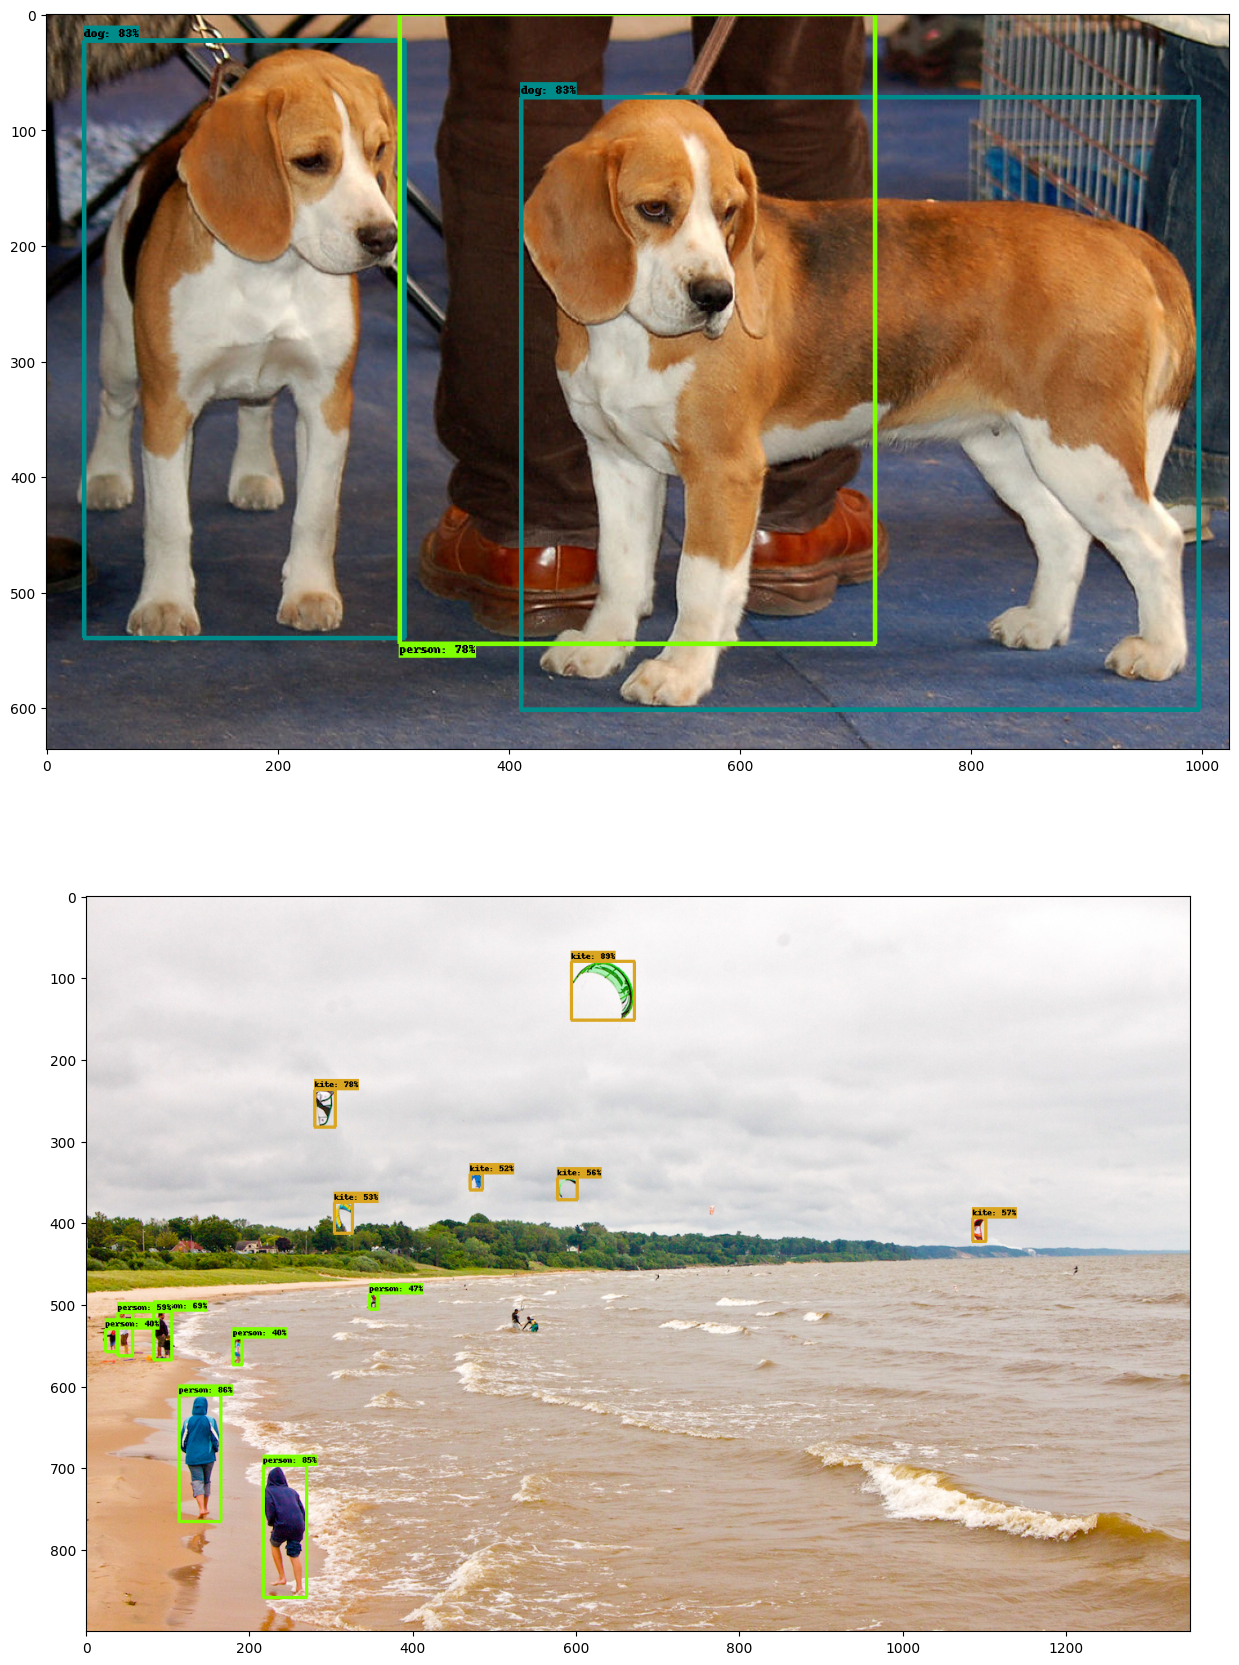

In [10]:
# Now lets test the model
import time

image_dir = 'models/research/object_detection/test_images'
elapsed = []

for i in range(2):
    image_path = os.path.join(image_dir, 'image' + str(i+1) + '.jpg')
    image_np = load_image_into_numpy_array(image_path)
    input_tensor = np.expand_dims(image_np, 0)
    start_time = time.time()
    detections = detect_fn(input_tensor)
    end_time = time.time()
    elapsed.append(end_time - start_time)
    
    plt.rcParams['figure.figsize'] = [42, 21]
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates = True,
        max_boxes_to_draw = 200,
        min_score_thresh = 0.40,    # This is the threshold value for recognition to be considered correct
        agnostic_mode = False
    )
    plt.subplot(2,1,i+1)
    plt.imshow(image_np_with_detections)
    
mean_elapsed = sum(elapsed) / float(len(elapsed)) 
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')    